In [89]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
data_frame = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_1_all_features.csv')

In [91]:
data_frame.shape

(20631, 26)

In [92]:
data_frame.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0


In [93]:
data_frame.tail()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,2
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,2
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2
20630,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,21.61,...,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522,2


In [94]:
data_frame.isnull().sum()

Cycle              0
OpSet1             0
OpSet2             0
OpSet3             0
SensorMeasure1     0
SensorMeasure2     0
SensorMeasure3     0
SensorMeasure4     0
SensorMeasure5     0
SensorMeasure6     0
SensorMeasure7     0
SensorMeasure8     0
SensorMeasure9     0
SensorMeasure10    0
SensorMeasure11    0
SensorMeasure12    0
SensorMeasure13    0
SensorMeasure14    0
SensorMeasure15    0
SensorMeasure16    0
SensorMeasure17    0
SensorMeasure18    0
SensorMeasure19    0
SensorMeasure20    0
SensorMeasure21    0
labels             0
dtype: int64

#### 0 ---> Early Stage of Deterioration
#### 1 ---> Mid Stage of Deterioration
#### 2 ---> End Stage of Deterioration


In [95]:
data_frame['labels'].value_counts()

0    12338
2     4163
1     4130
Name: labels, dtype: int64

In [96]:
data_frame.describe()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
count,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,0.603752
std,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,0.801769
min,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,0.000000
50%,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,0.000000
75%,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,1.000000
max,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,2.000000


#### Concatenate all the training csv files

In [97]:
d1 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_1_all_features.csv')
d2 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_2_all_features.csv')
d3 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_3_all_features.csv')
d4 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_4_all_features.csv')

In [98]:
data_frame = pd.concat([d1,d2,d3,d4])

In [99]:
data_frame.shape

(160359, 26)

In [100]:
data_frame.isnull().sum()

Cycle              0
OpSet1             0
OpSet2             0
OpSet3             0
SensorMeasure1     0
SensorMeasure2     0
SensorMeasure3     0
SensorMeasure4     0
SensorMeasure5     0
SensorMeasure6     0
SensorMeasure7     0
SensorMeasure8     0
SensorMeasure9     0
SensorMeasure10    0
SensorMeasure11    0
SensorMeasure12    0
SensorMeasure13    0
SensorMeasure14    0
SensorMeasure15    0
SensorMeasure16    0
SensorMeasure17    0
SensorMeasure18    0
SensorMeasure19    0
SensorMeasure20    0
SensorMeasure21    0
labels             0
dtype: int64

In [101]:
X = data_frame.iloc[:,0:25]

In [102]:
X.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [103]:
Y = data_frame['labels']

In [104]:
Y.value_counts()

0    95933
2    32348
1    32078
Name: labels, dtype: int64

In [105]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,shuffle=True,stratify=Y,random_state=35)

In [106]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

### At this point it seems like the Model is subject to overfitting

In [107]:
train_pred = RF.predict(X_train)
train_acc_score = accuracy_score(Y_train,train_pred)
print(train_acc_score)

0.9999821827867903


In [108]:
test_pred = RF.predict(X_test)
test_acc_score = accuracy_score(Y_test,test_pred)
print(test_acc_score)

0.8920761619689033


In [109]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,test_pred)
print(cnf_matrix)

[[27184  1574    22]
 [ 1805  7046   772]
 [    1  1018  8686]]


Text(0.5, 355.0, 'Predicted label')

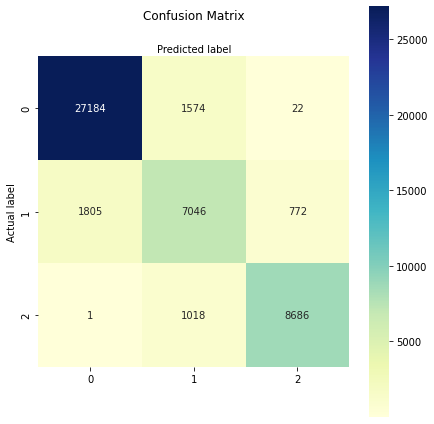

In [110]:
import seaborn as sns
class_names=['0','1','2'] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',square=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [111]:
from sklearn import metrics

In [112]:
print("Accuracy:",'%.4f' % metrics.accuracy_score(Y_test, test_pred))
print("Precision:",'%.4f' %metrics.precision_score(Y_test, test_pred,average = 'weighted'))
print("Recall:",'%.4f' %metrics.recall_score(Y_test, test_pred,average = 'weighted'))
print("F1 Score:",'%.4f' %metrics.f1_score(Y_test, test_pred,average = 'weighted'))
print(metrics.precision_recall_fscore_support(Y_test, test_pred,average = 'weighted'))

Accuracy: 0.8921
Precision: 0.8920
Recall: 0.8921
F1 Score: 0.8920
(0.8920402331726414, 0.8920761619689033, 0.8920255405854, None)
